In [3]:
# 📦 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [5]:
# 📥 2. Load the Dataset
df = pd.read_csv('superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2017-152156,11/8/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2017-138688,6/12/2017,6/16/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2016-108966,10/11/2016,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [7]:
# 🧹 3. Data Cleaning and Preparation
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Check for missing values
df.isnull().sum()

Row ID             0
Order ID           0
Order Date       806
Ship Date        806
Ship Mode        806
Customer ID      806
Customer Name    806
Segment          806
Country          806
City             806
State            806
Postal Code      817
Region           806
Product ID       806
Category         806
Sub-Category     806
Product Name     806
Sales            806
Quantity         806
Discount         806
Profit           806
dtype: int64

In [9]:
# 📊 4. RFM Analysis (Recency, Frequency, Monetary)
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
AA-10315,185,5,5563.560
AA-10375,20,9,1056.390
AA-10480,260,4,1790.512
AA-10645,56,6,5086.935
AB-10015,416,3,886.156


In [11]:
# 🤖 5. Customer Clustering using KMeans
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm['Cluster'] = rfm['Cluster'].astype(str)

rfm.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,72.286667,8.506667,3308.286885
1,101.777778,4.717718,1672.318202
2,123.718750,8.296875,9479.545687
3,559.250000,3.697917,1470.228226


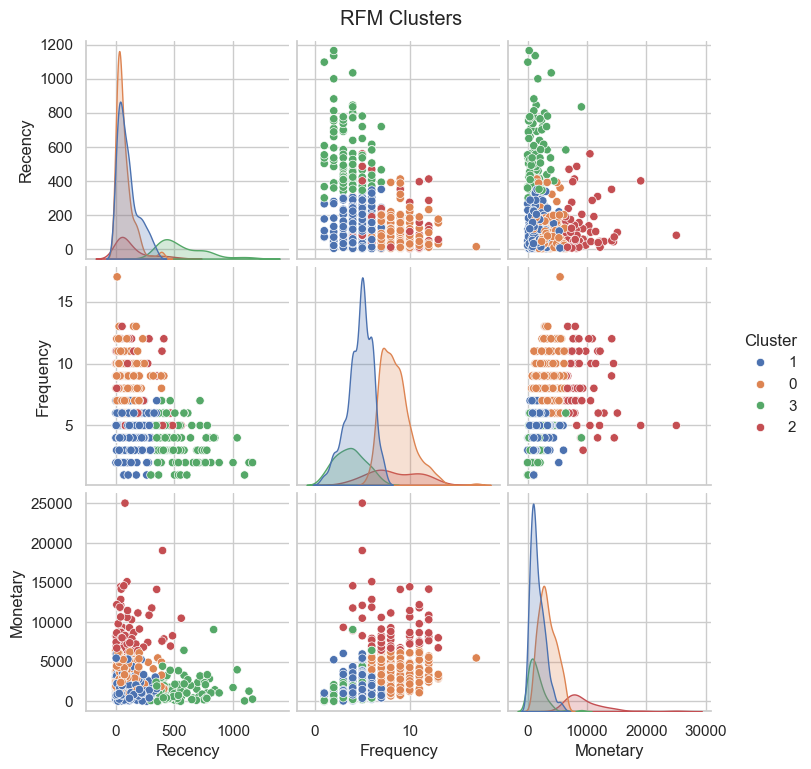

In [13]:
# 📈 6. Visualize RFM Clusters
sns.pairplot(rfm.reset_index(), hue='Cluster', diag_kind='kde')
plt.suptitle('RFM Clusters', y=1.02)
plt.show()

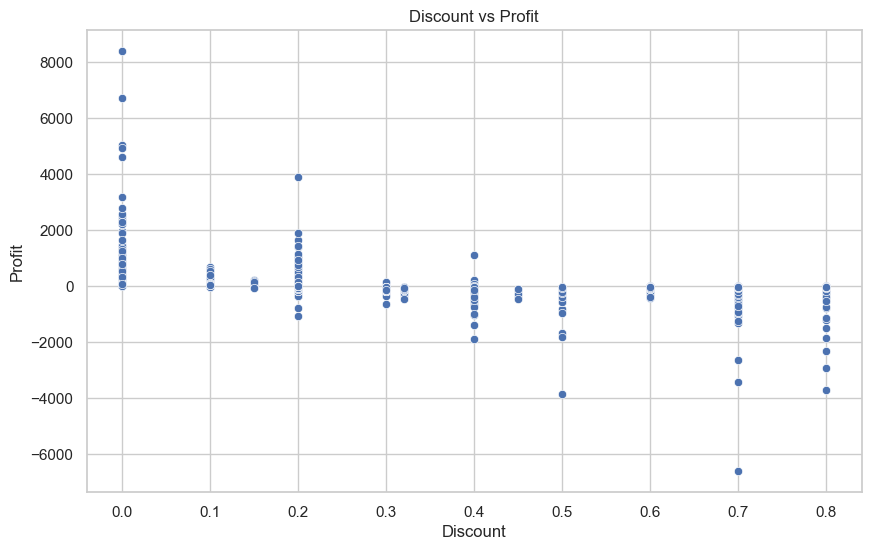

In [15]:
# 💸 7. Discount vs Profit Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()

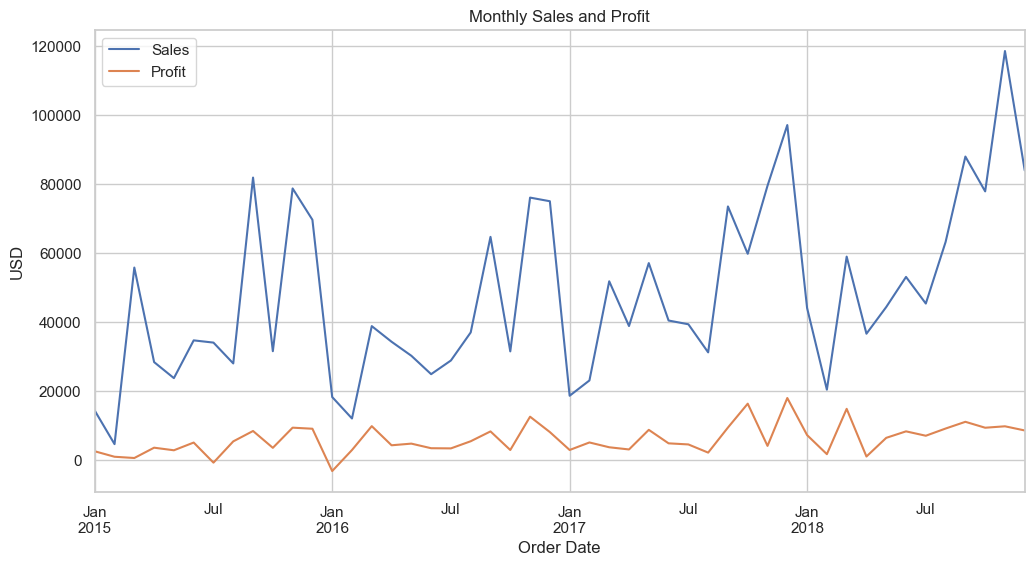

In [17]:
# ⏳ 8. Monthly Sales and Profit Trends
monthly = df.set_index('Order Date').resample('M').agg({'Sales': 'sum', 'Profit': 'sum'})
monthly.plot(figsize=(12, 6), title='Monthly Sales and Profit')
plt.ylabel('USD')
plt.show()

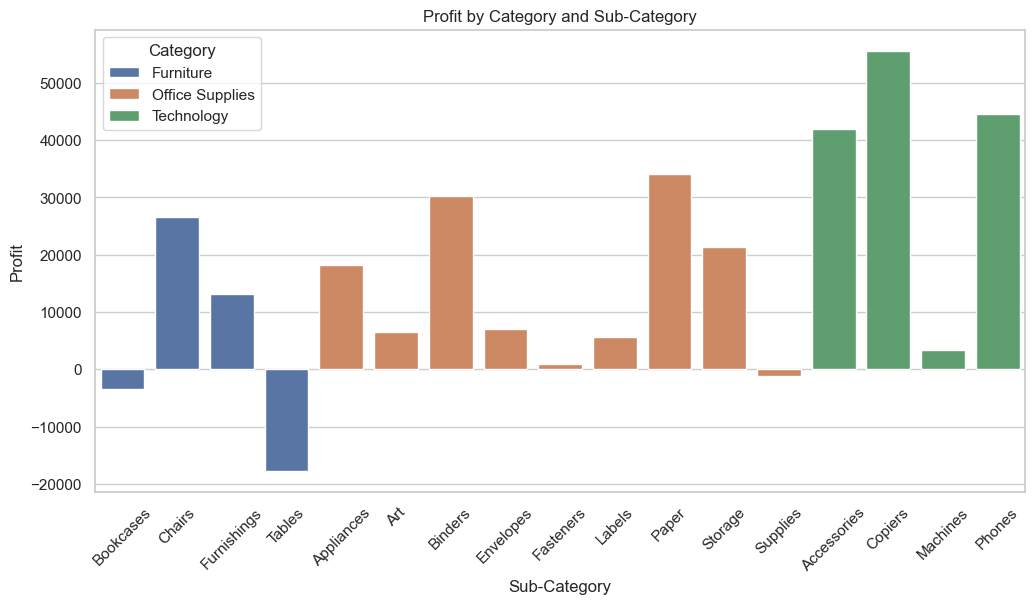

In [19]:
# 🧾 9. Profit by Category and Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index(),
            x='Sub-Category', y='Profit', hue='Category')
plt.title('Profit by Category and Sub-Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## 📌 Key Business Insights:
- **High-value customers** were successfully segmented using RFM.
- **Discounts** show a mixed effect — high discounts often reduce profit.
- **Office Supplies** contribute the highest frequency but not always profitability.
- **Furniture** has volatile profit margins — often affected by high discounts.

## ✅ Recommendations:
- Focus marketing on high RFM customers (Cluster 0).
- Reduce excessive discounting in low-margin categories.
- Improve shipping efficiency in underperforming regions.
- Explore loyalty programs tailored to customer clusters.